<a href="https://colab.research.google.com/github/rajeevfromkrec/udacity_datascience/blob/main/Udacity_data_science_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


In [2]:
|!ls

developer_survey_2020.zip  sample_data


In [3]:
!unzip developer_survey_2020.zip

Archive:  developer_survey_2020.zip
  inflating: README_2020.txt         
  inflating: so_survey_2020.pdf      
  inflating: survey_results_public.csv  
  inflating: survey_results_schema.csv  


In [4]:
df=pd.read_csv('survey_results_public.csv')

In [5]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;Developer, full-stack","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-employed",White or of European descent,Man,"Languages, frameworks, and other technologies I’d be working with;Remote work options;Opportunities for professional development",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work with,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other physical activity;Do other work and come back later,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or software engineering",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who codes);Stack Exchange (public Q&A for a variety of topics);Stack Overflow Jobs (for job seekers),Visit Stack Overflow;Go for a walk or other physical activity,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or software engineering",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office environment or company culture;Opportunities for professional developmen

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [7]:
schema=pd.read_csv('survey_results_schema.csv')

In [8]:
schema.head(60)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,Age,"What is your age (in years)? If you prefer not to answer, you may leave this question blank."
4,Age1stCode,"At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)"
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,"What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty."
7,ConvertedComp,"Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks."
8,Country,Where do you live?
9,CurrencyDesc,"Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in."


In [13]:
df.YearsCode.isnull().sum()

6777

In [14]:
df=df.dropna(subset=['YearsCode'])

In [15]:
df.YearsCode.isnull().sum()

0

In [9]:
df.YearsCode.value_counts()

10                    4510
5                     4249
6                     3834
7                     3477
8                     3407
4                     3254
3                     2951
15                    2586
20                    2562
12                    2453
9                     2344
2                     1916
11                    1691
14                    1479
13                    1468
25                    1338
16                    1203
30                    1114
18                    1089
17                    1057
1                     902 
22                    792 
Less than 1 year      757 
19                    657 
35                    599 
23                    572 
21                    550 
40                    535 
24                    449 
26                    378 
27                    335 
28                    314 
32                    309 
38                    289 
37                    258 
36                    246 
33                    236 
3

In [19]:
def map_year(x):
  if x== "Less than 1 year":
     y=0.5
  elif x== "More than 50 years":
    y=50.5
  else:
    y=x
  return y


#{"Less than 1 year":0.5,"More than 50 years": 50.5}

df.YearsCode=df.YearsCode.map(map_year)

In [20]:
df['YearsCode_float']=[ float(x) for x in df.YearsCode]

In [34]:
df["CodeYearsRange"]=pd.cut(df.YearsCode_float, bins=[0,10,20,30,40,50,60] )

In [35]:
df_desired_tech=df[['MiscTechDesireNextYear','YearsCode_float','CodeYearsRange']]

In [36]:
df_desired_tech.dropna(subset=['MiscTechDesireNextYear'])

,MiscTechDesireNextYear,YearsCode_float,CodeYearsRange
0,.NET Core;Xamarin,36.0,"(30, 40]"
1,React Native;TensorFlow;Unity 3D,7.0,"(0, 10]"
4,Ansible;Chef,15.0,"(10, 20]"
7,Unity 3D,17.0,"(10, 20]"
9,Pandas;TensorFlow,8.0,"(0, 10]"
...,...,...,...
64437,.NET;Unreal Engine,0.5,"(0, 10]"
64438,.NET;Node.js;Unity 3D,0.5,"(0, 10]"
64441,.NET Core;Unity 3D,7.0,"(0, 10]"
64446,Flutter;Node.js;React Native;TensorFlow;Unity 3D;Xamarin,6.0,"(0, 10]"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99c0bae668>]],
      dtype=object)

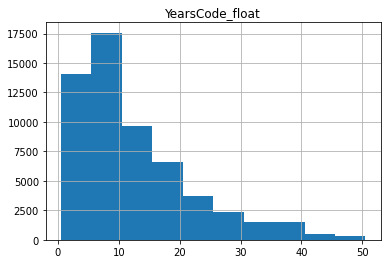

In [37]:
df_desired_tech.hist()

In [58]:
df2=df_desired_tech.groupby(['CodeYearsRange','MiscTechDesireNextYear']).count().sort_values(['YearsCode_float'],ascending=False).reset_index()

In [60]:
df2.columns=(['CodeYearsRange', 'MiscTechDesireNextYear', 'Count'])

In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30444 entries, 0 to 30443
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CodeYearsRange          30444 non-null  category
 1   MiscTechDesireNextYear  30444 non-null  object  
 2   Count                   7660 non-null   float64 
dtypes: category(1), float64(1), object(1)
memory usage: 505.9+ KB


In [ ]:
df.MiscTechDesireNextYear.value_counts()

Node.js                                                                     4134
Node.js;React Native                                                        1615
.NET;.NET Core                                                              1484
.NET Core                                                                   1218
Flutter                                                                     1009
                                                                            ... 
Apache Spark;Chef;Hadoop;Node.js;Pandas;React Native;TensorFlow;Unity 3D    1   
.NET Core;Cordova;Flutter;Node.js;React Native                              1   
.NET;.NET Core;Chef;Puppet;Unity 3D;Xamarin                                 1   
Node.js;Pandas;TensorFlow;Unity 3D;Unreal Engine;Xamarin                    1   
Ansible;Chef;React Native;Teraform                                          1   
Name: MiscTechDesireNextYear, Length: 5216, dtype: int64

In [ ]:
schema.head(60)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,Age,"What is your age (in years)? If you prefer not to answer, you may leave this question blank."
4,Age1stCode,"At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)"
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,"What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty."
7,ConvertedComp,"Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks."
8,Country,Where do you live?
9,CurrencyDesc,"Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in."


####Which are popular desired technologies  among different experiance ranges

In [ ]:
df_desired_tech=df[['MiscTechDesireNextYear','YearsCode']]

In [ ]:
df.YearsCode.value_counts()

10                    4510
5                     4249
6                     3834
7                     3477
8                     3407
4                     3254
3                     2951
15                    2586
20                    2562
12                    2453
9                     2344
2                     1916
11                    1691
14                    1479
13                    1468
25                    1338
16                    1203
30                    1114
18                    1089
17                    1057
1                     902 
22                    792 
Less than 1 year      757 
19                    657 
35                    599 
23                    572 
21                    550 
40                    535 
24                    449 
26                    378 
27                    335 
28                    314 
32                    309 
38                    289 
37                    258 
36                    246 
33                    236 
3

In [ ]:
df['YearsCode_int']=[ int(x) for x in df.YearsCode]

ValueError: ignored

In [ ]:
df_desired_tech["CodeYearsRange"]=pd.cut(df_desired_tech.YearsCode, bins=[0,10,20,30,40,50,60,70,80,90,100] )
                                       

TypeError: ignored